In [20]:
def read_data(text, label, filename, polarity):
    f = open(filename)
    for line in f:
        line = line.strip()
        if line:
            text.append(line)
            label.append(polarity)
    f.close()

In [21]:
def tokenize(comment):
    tokens = re.split('[.,!?; \t]+', comment.strip())
    items = []
    for token in tokens:
        if token:
            items.append(token)
    return items

In [22]:
def update(text, data):
    for comment in text:
        items = []
        for token in tokenize(comment):
            token = token.lower()
            if token not in token2idx:
                token2idx[token] = len(token2idx)
            items.append(token2idx[token])
        data.append(items)

In [23]:
import re

train_text = []
train_label = []
train_data = []
test_data = []
test_text = []
test_label = []
token2idx = {}
token2idx['PAD'] = 0;
MAX_LENGTH = 100
path = '/media/nguyen/Data/DSLab/2019/Proposals/Viettel-Telecom/MReset-MyViettel/Training/sa/dataset/'
train_positive_path = path + 'SA_train_positive.txt'
train_negative_path = path + 'SA_train_negative.txt'
test_positive_path = path + 'SA_test_positive.txt'
test_negative_path = path + 'SA_test_negative.txt'

read_data(train_text, train_label, train_positive_path, 1)
read_data(train_text, train_label, train_negative_path, 0)

read_data(test_text, test_label, test_positive_path, 1)
read_data(test_text, test_label, test_negative_path, 0)

update(train_text, train_data)
update(test_text, test_data)

In [24]:
from keras.preprocessing import sequence
train_data = sequence.pad_sequences(train_data, padding='post', maxlen=MAX_LENGTH)
test_data = sequence.pad_sequences(test_data, padding='post', maxlen=MAX_LENGTH)

In [54]:
from keras import layers
from keras import models

V = len(token2idx)

model = models.Sequential()
model.add(layers.Embedding(V, 32, input_length=MAX_LENGTH))

model.add(layers.Conv1D(32, 2, activation='relu'))
model.add(layers.GlobalMaxPooling1D())

# model.add(layers.Flatten())
# model.add(layers.Dense(32, activation='sigmoid'))

model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 32)           189888    
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 99, 32)            2080      
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 192,001
Trainable params: 192,001
Non-trainable params: 0
_________________________________________________________________


In [55]:
from keras import optimizers

optimizer = optimizers.RMSprop(lr=0.001)

model.compile(optimizer,
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [56]:
history = model.fit(
    train_data, train_label,
    shuffle=True,
    epochs=30,
    batch_size=64,
    validation_data=[test_data, test_label])

Train on 2800 samples, validate on 599 samples
Epoch 1/30
2800/2800 [==============================] - 2s 670us/step - loss: 0.6818 - acc: 0.6182 - val_loss: 0.6653 - val_acc: 0.7262
Epoch 2/30
2800/2800 [==============================] - 1s 251us/step - loss: 0.6310 - acc: 0.7939 - val_loss: 0.5996 - val_acc: 0.7997
Epoch 3/30
2800/2800 [==============================] - 1s 234us/step - loss: 0.5463 - acc: 0.8154 - val_loss: 0.5190 - val_acc: 0.7980
Epoch 4/30
2800/2800 [==============================] - 1s 243us/step - loss: 0.4665 - acc: 0.8229 - val_loss: 0.4654 - val_acc: 0.8097
Epoch 5/30
2800/2800 [==============================] - 1s 250us/step - loss: 0.4011 - acc: 0.8393 - val_loss: 0.4314 - val_acc: 0.8230
Epoch 6/30
2800/2800 [==============================] - 1s 279us/step - loss: 0.3475 - acc: 0.8661 - val_loss: 0.4087 - val_acc: 0.8164
Epoch 7/30
2800/2800 [==============================] - 1s 281us/step - loss: 0.3021 - acc: 0.8836 - val_loss: 0.3952 - val_acc: 0.8214
E

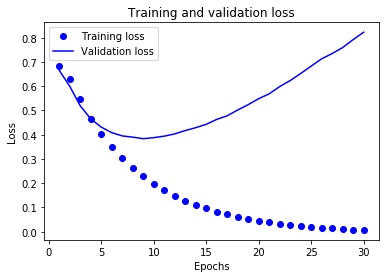

In [57]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

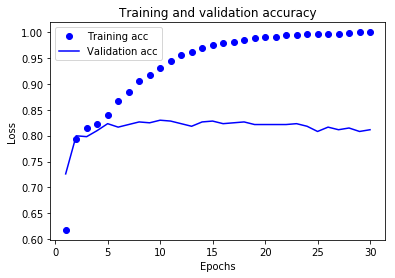

In [58]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()